C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

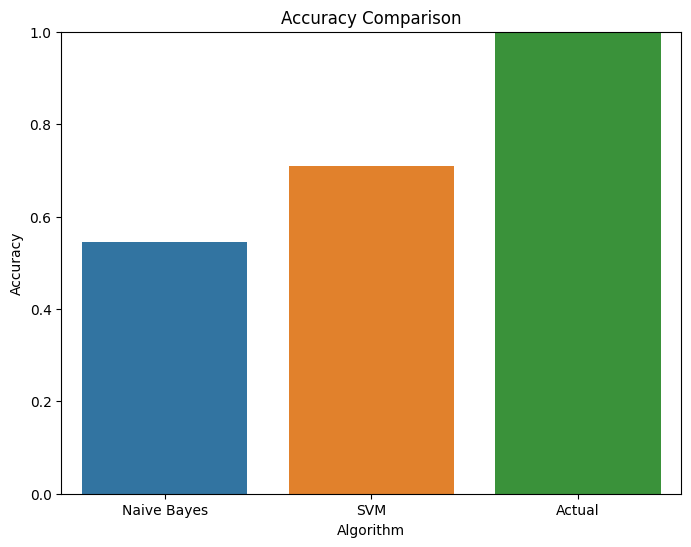

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     negatif       0.49      0.76      0.59        72
      netral       0.62      0.63      0.62        86
     positif       0.00      0.00      0.00        42

    accuracy                           0.55       200
   macro avg       0.37      0.46      0.41       200
weighted avg       0.44      0.55      0.48       200

SVM Classification Report:
              precision    recall  f1-score   support

     negatif       0.76      0.72      0.74        72
      netral       0.64      0.84      0.73        86
     positif       0.90      0.43      0.58        42

    accuracy                           0.71       200
   macro avg       0.77      0.66      0.68       200
weighted avg       0.74      0.71      0.70       200



In [1]:
#Load package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load dataset from CSV
df = pd.read_csv('nama_file_hasil.csv')

# Preprocess the text data (tokenization, lowercasing, etc.) if needed
def preprocess_text(text):
    # Menghapus tanda baca dan karakter khusus
    text = re.sub(r'[^\w\s]', '', text)

    # Mengubah teks menjadi lowercase
    text = text.lower()

    # Menghapus stopwords
    stop_words = set(stopwords.words('indonesian'))
    tokens = nltk.word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_text)

    return text

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['Sentiment'], test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
X_train_vectors = vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_vectors = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectors, y_train)

# Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_vectors, y_train)

# Predict the sentiment labels for the testing data
y_pred_nb = naive_bayes.predict(X_test_vectors)
y_pred_svm = svm.predict(X_test_vectors)

# Calculate the accuracy of the classifiers
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Generate classification report for the classifiers
classification_report_nb = classification_report(y_test, y_pred_nb)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Create a DataFrame to store the accuracy values
data = {
    'Algorithm': ['Naive Bayes', 'SVM', 'Actual'],
    'Accuracy': [accuracy_nb, accuracy_svm, 1.0]
}
accuracy_df = pd.DataFrame(data)

# Plot the accuracy values
plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df)
plt.ylim([0, 1])
plt.title('Accuracy Comparison')
plt.show()

# Print the classification report
print('Naive Bayes Classification Report:')
print(classification_report_nb)
print('SVM Classification Report:')
print(classification_report_svm)
